In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
df = pd.read_csv("SageTextClassification.csv")

In [2]:
df.head()

,Topic,Sub-Category,Abstract
0,Life Sciences,Environmental Science,Repeated Wi-Fi studies show that Wi-Fi causes ...
1,Life Sciences,Environmental Science,Biodiversity of insects is threatened worldwid...
2,Life Sciences,"Biochemistry, Genetics and Molecular Biology",Autism spectrum disorder is a neurodevelopment...
3,Life Sciences,"Biochemistry, Genetics and Molecular Biology",Blebs are spherical plasma membrane protrusion...
4,Life Sciences,Agricultural and Biological Sciences,The symbiotic diazotrophs comprise with a very...


In [3]:
df['Abstract'] = df['Abstract'].str.lower()
df['Topic'].unique()

array(['Life Sciences', 'Health Sciences', 'physical_sciences'],
      dtype=object)

In [4]:
df = df.drop(columns = ['Sub-Category'])

In [6]:
df.head()
df.describe()

,Topic,Abstract
count,230,230
unique,3,221
top,physical_sciences,reliable and sensitive detection of antigen sp...
freq,79,2


In [7]:
df[df.isnull().any(axis=1)]

,Topic,Abstract


In [8]:
df['Topic'] = df['Topic'].astype('category')
df['Topic'] = df['Topic'].cat.codes

In [9]:
df.head()

,Topic,Abstract
0,1,repeated wi-fi studies show that wi-fi causes ...
1,1,biodiversity of insects is threatened worldwid...
2,1,autism spectrum disorder is a neurodevelopment...
3,1,blebs are spherical plasma membrane protrusion...
4,1,the symbiotic diazotrophs comprise with a very...


In [10]:
df['Topic'].unique()

array([1, 0, 2])

In [11]:
X = df.Abstract
y = df.Topic 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [13]:
vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X).toarray()
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_model = LogisticRegression()

In [17]:
log_model = log_model.fit(X=X_train, y=y_train)

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
y_pred = log_model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[15  3  5]
 [ 2 12  1]
 [ 0  3 17]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.67      0.80      0.73        15
           2       0.74      0.85      0.79        20

   micro avg       0.76      0.76      0.76        58
   macro avg       0.76      0.77      0.76        58
weighted avg       0.78      0.76      0.76        58

0.7586206896551724


In [20]:
## SVM
from sklearn import svm
clf = svm.SVC(kernel = "linear")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [21]:
#Evaluation of Model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7068965517241379
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.71      0.67      0.69        15
           2       0.73      0.80      0.76        20

   micro avg       0.71      0.71      0.71        58
   macro avg       0.71      0.71      0.71        58
weighted avg       0.71      0.71      0.71        58



In [22]:
###Decision Tree model
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Tried with criterion as entropy and ginni got accuracy of 0.48 and 0.5

Accuracy: 0.603448275862069


In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

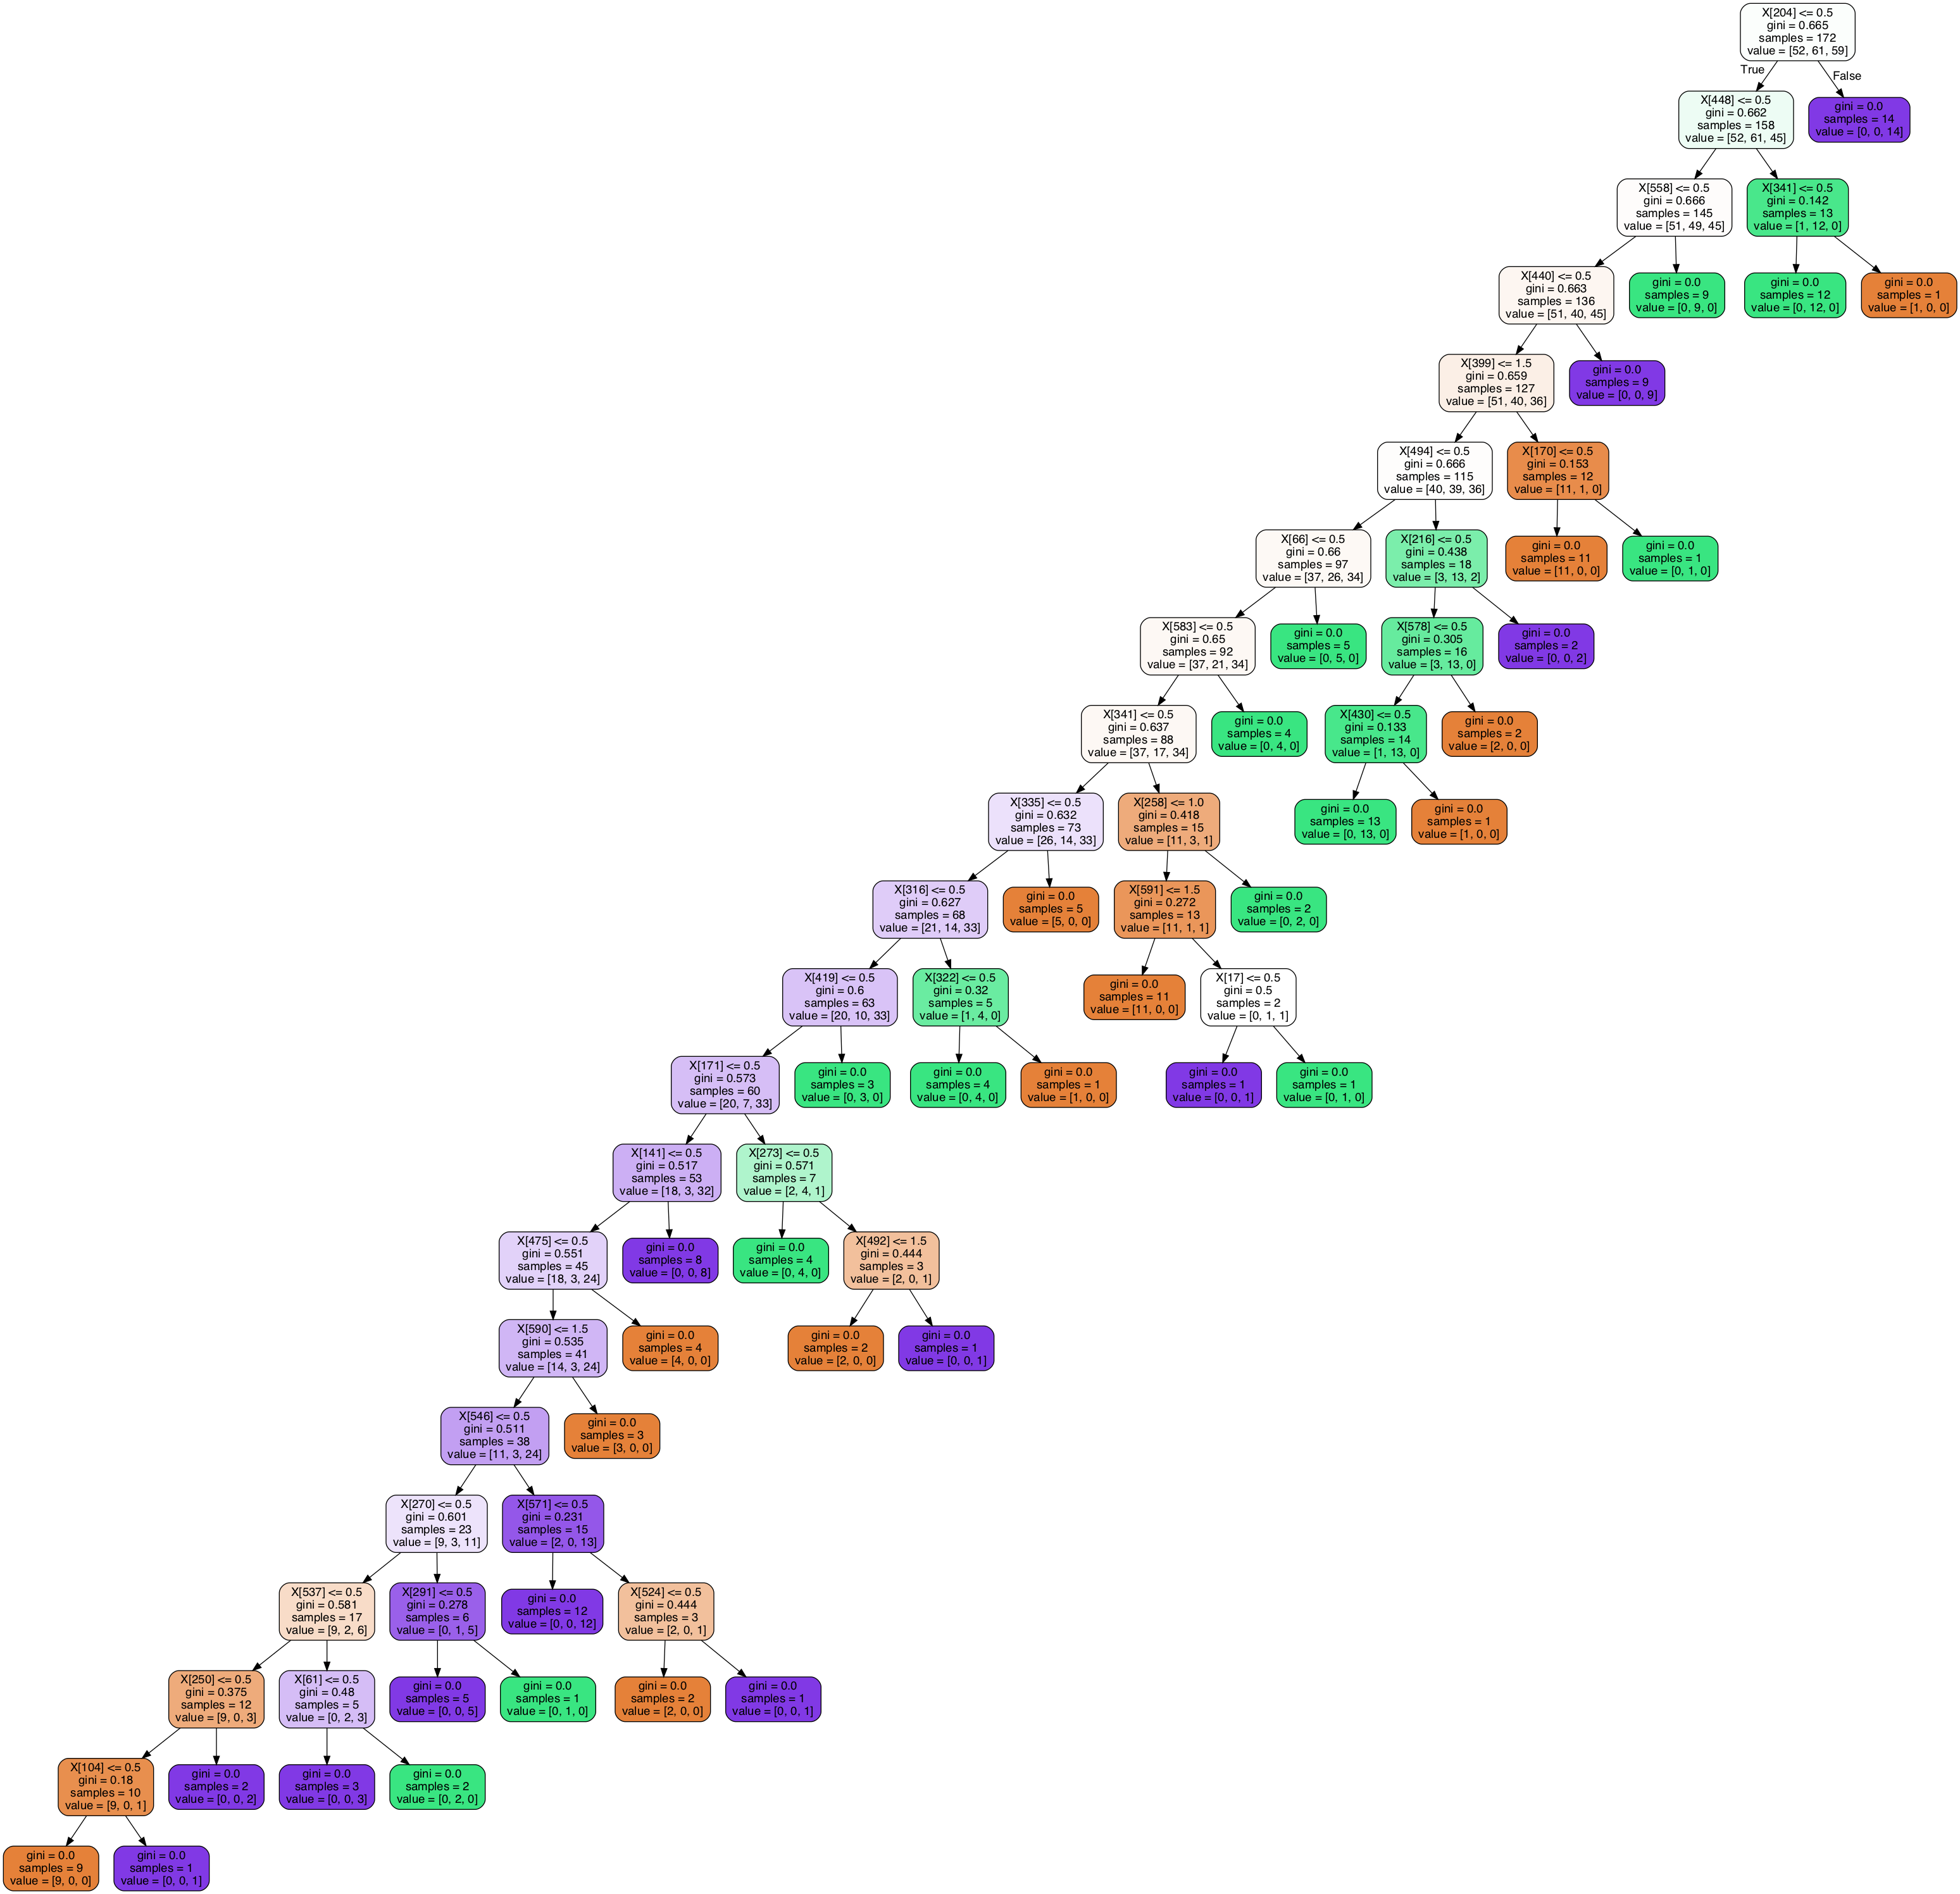

In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Text Classification.png')
Image(graph.create_png())

In [26]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7413793103448276


In [28]:
# Predicting topic from extract
#clf.predict([])

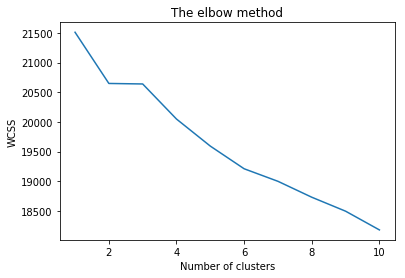

In [30]:
#Kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [31]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

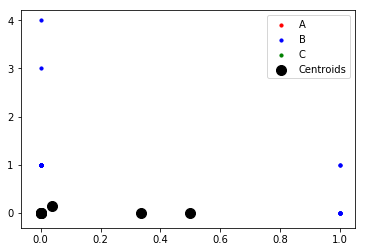

In [32]:
import numpy as np
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'C')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [33]:
#Keras neural network
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np
data = 
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

In [35]:
data = np.random.random((1000, 100))
data

array([[0.9583466 , 0.51504342, 0.76184139, ..., 0.30840698, 0.10903299,
        0.0038193 ],
       [0.21086853, 0.95296955, 0.4867011 , ..., 0.02498872, 0.71897538,
        0.28524592],
       [0.72553136, 0.67897246, 0.61866122, ..., 0.6302903 , 0.57606845,
        0.37670017],
       ...,
       [0.56278029, 0.43843566, 0.07755116, ..., 0.34851768, 0.30138151,
        0.35622998],
       [0.04473403, 0.66345299, 0.02682078, ..., 0.67781323, 0.63844525,
        0.38308595],
       [0.42588944, 0.87100699, 0.0843759 , ..., 0.88564591, 0.77919304,
        0.05977015]])